In [1]:
from algorithms.AffinityClusteringMPC import AffinityClusteringMPC
from algorithms.Graph import Graph

G = Graph()
G.add_vertex(1)
G.add_vertex(2)
G.add_vertex(3)
G.add_vertex(4)
G.add_vertex(5)
G.add_vertex(6)
G.add_vertex(7)
G.add_vertex(8)
G.add_vertex(9)
G.add_vertex(10)
G.add_edge(1, 7, 8)
G.add_edge(1, 2, 2)
G.add_edge(2, 3, 1)
G.add_edge(2, 6, 8)
G.add_edge(3, 7, 7)
G.add_edge(3, 4, 6)
G.add_edge(3, 6, 7)
G.add_edge(4, 5, 1)
G.add_edge(4, 7, 8)
G.add_edge(4, 10, 5)
G.add_edge(5, 6, 8)
G.add_edge(7, 9, 4)
G.add_edge(8, 7, 3)
G.add_edge(8, 9, 3)
G.add_edge(8, 10, 2)
G.add_edge(10, 9, 4)

In [2]:
alg = AffinityClusteringMPC(G, max_iterations=10, print_graph=True)
alg.run()

running boruvkas algorithm: max_iterations = 10
	vertices:['(1, {2, 7}) ', '(2, {1, 3, 6}) ', '(3, {2, 4, 6, 7}) ', '(4, {10, 3, 5, 7}) ', '(5, {4, 6}) ', '(6, {2, 3, 5}) ', '(7, {1, 3, 4, 8, 9}) ', '(8, {9, 10, 7}) ', '(9, {8, 10, 7}) ', '(10, {8, 9, 4}) ']
	edges:['((7, 1), 8) ', '((2, 1), 2) ', '((3, 2), 1) ', '((6, 2), 8) ', '((7, 3), 7) ', '((4, 3), 6) ', '((6, 3), 7) ', '((5, 4), 1) ', '((7, 4), 8) ', '((10, 4), 5) ', '((6, 5), 8) ', '((9, 7), 4) ', '((8, 7), 3) ', '((9, 8), 3) ', '((10, 8), 2) ', '((10, 9), 4) ']
round 1
Lambda: {1: 2, 2: 3, 3: 2, 4: 5, 5: 4, 6: 3, 7: 8, 8: 10, 9: 8, 10: 8}
Neighborhoods: {2: {1, 2, 3, 6}, 4: {4, 5}, 8: {8, 9, 10, 7}}
Contracted: {(8, 4): 5, (8, 2): 7, (4, 2): 6}
	vertices:['(8, {2, 4}) ', '(4, {8, 2}) ', '(2, {8, 4}) ']
	edges:['((8, 4), 5) ', '((8, 2), 7) ', '((4, 2), 6) ']
round 2
Lambda: {2: 4, 4: 8, 8: 4}
Neighborhoods: {4: {8, 2, 4}}
Contraction skipped.
	vertices:['(4, {}) ']
	edges:[]


running boruvkas algorithm: max_iterations = 100
round 1
Lambda: {0: 189, 20: 103, 40: 12, 60: 164, 80: 62, 100: 256, 120: 140, 140: 120, 160: 258, 180: 270, 200: 287, 220: 217, 240: 296, 260: 189, 280: 31, 1: 150, 21: 203, 41: 253, 61: 175, 81: 292, 101: 271, 121: 69, 141: 154, 161: 250, 181: 55, 201: 259, 221: 225, 241: 46, 261: 1, 281: 163, 2: 124, 22: 66, 42: 243, 62: 80, 82: 187, 102: 211, 122: 228, 142: 79, 162: 59, 182: 179, 202: 23, 222: 88, 242: 126, 262: 263, 282: 205, 3: 185, 23: 202, 43: 79, 63: 95, 83: 236, 103: 20, 123: 185, 143: 114, 163: 113, 183: 46, 203: 243, 223: 73, 243: 42, 263: 262, 283: 157, 4: 241, 24: 133, 44: 56, 64: 159, 84: 191, 104: 165, 124: 2, 144: 136, 164: 278, 184: 117, 204: 183, 224: 174, 244: 46, 264: 241, 284: 59, 5: 78, 25: 120, 45: 275, 65: 156, 85: 27, 105: 53, 125: 12, 145: 242, 165: 104, 185: 123, 205: 274, 225: 221, 245: 137, 265: 233, 285: 31, 6: 221, 26: 185, 46: 183, 66: 62, 86: 52, 106: 112, 126: 158, 146: 199, 166: 83, 186: 78, 206: 55, 2

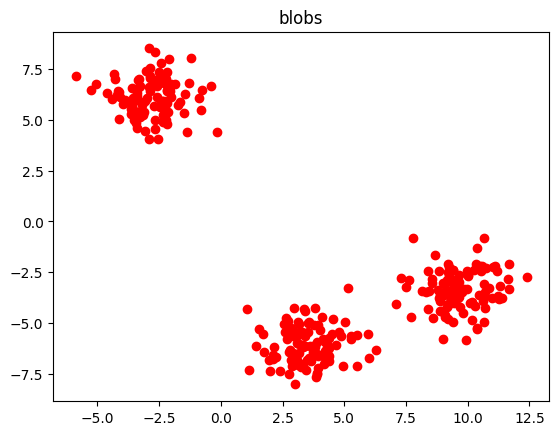

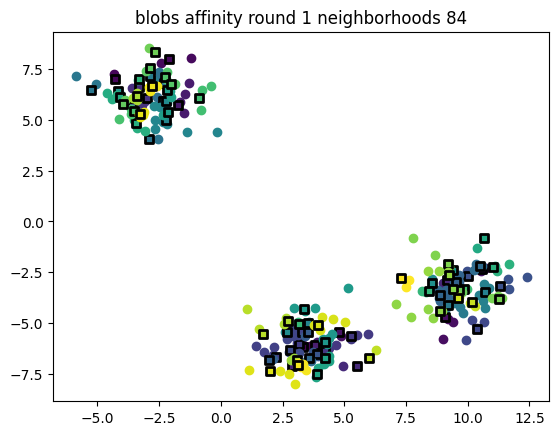

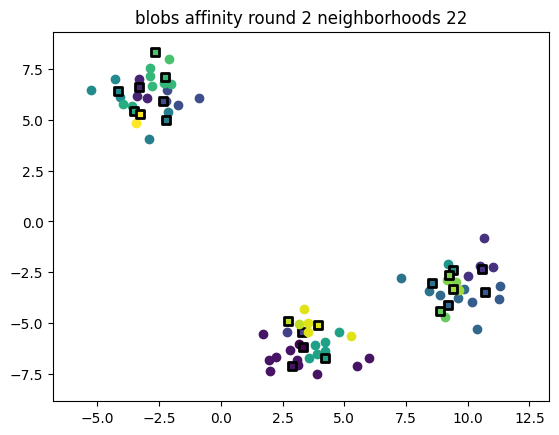

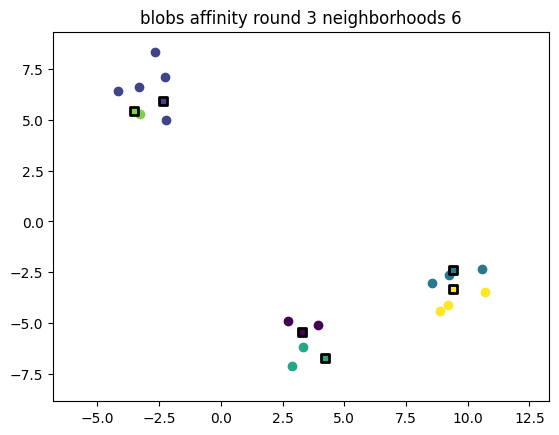

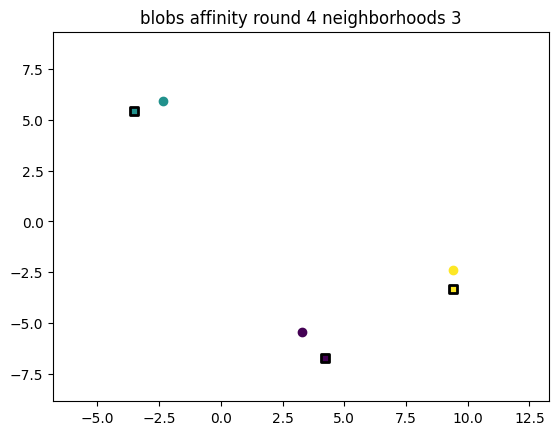

In [4]:
from utils.GraphGenerator import GraphGenerator
from utils.GraphVisualizer import GraphVisualizer
from utils.datasets import generate_points

name = 'blobs'
points = generate_points(name)
G = GraphGenerator(points.copy()) \
    .to_graph(gen_pair_wise=True)

gv = GraphVisualizer(G, True)
gv.plot_graph(f'{name}')

max_iterations = 100
plot_graph = lambda i: gv.plot_neighborhoods(f'{name} affinity round {i}')
alg = AffinityClusteringMPC(G, max_iterations, False, plot_graph)
alg.run()